In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers

import cv2
from PIL import Image


In [8]:
# Caminho para a pasta onde estão as subpastas 'adenocarcinoma', 'benign', 'squamous_cell_carcinoma'
base_path = "C:\\Users\\dcris\\Desktop\\ADNE\\archive"

# Verifica as classes disponíveis
classes = os.listdir(base_path)
print(f"Classes encontradas: {classes}")

# Conta quantas imagens há por classe
for classe in classes:
    class_path = os.path.join(base_path, classe)
    num_images = len(os.listdir(class_path))
    print(f"{classe}: {num_images} imagens")


Classes encontradas: ['adenocarcinoma', 'benign', 'squamous_cell_carcinoma']
adenocarcinoma: 5000 imagens
benign: 5000 imagens
squamous_cell_carcinoma: 5000 imagens


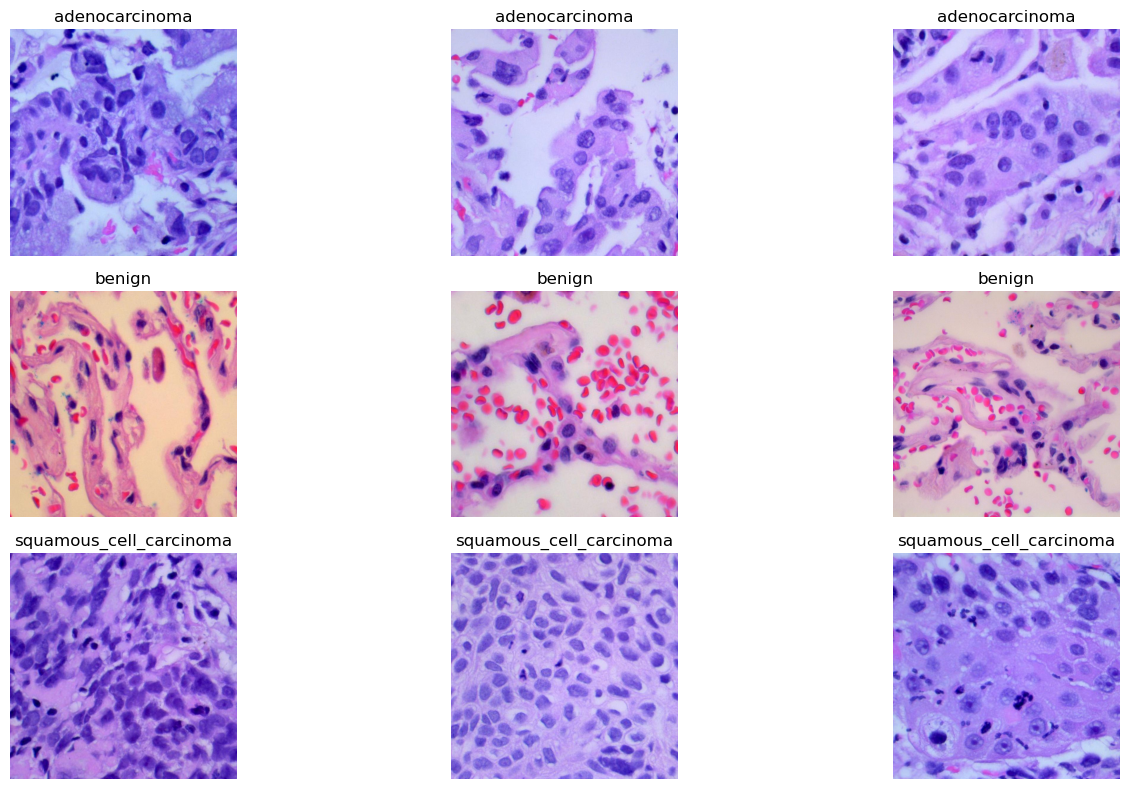

In [11]:
def show_sample_images(base_path, classes, samples_per_class=3):
    plt.figure(figsize=(15, 8))
    for i, classe in enumerate(classes):
        class_path = os.path.join(base_path, classe)
        images = os.listdir(class_path)
        for j in range(samples_per_class):
            img_path = os.path.join(class_path, random.choice(images))
            img = Image.open(img_path)
            plt.subplot(len(classes), samples_per_class, i * samples_per_class + j + 1)
            plt.imshow(img)
            plt.title(classe)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_images(base_path, classes)


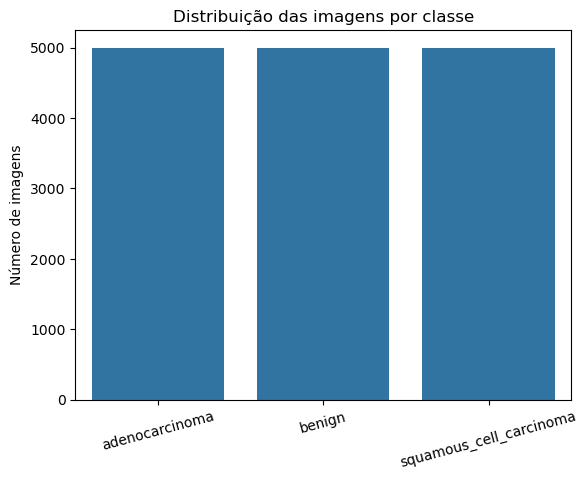

In [12]:
class_counts = {classe: len(os.listdir(os.path.join(base_path, classe))) for classe in classes}
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Distribuição das imagens por classe")
plt.ylabel("Número de imagens")
plt.xticks(rotation=15)
plt.show()


In [13]:
#redimensiona as imagens
img_size = (224, 224)
#o modelo vai processar 32 imagens de cada vez durante o treino.
batch_size = 32

#funcao muito util
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)# Normaliza os valores dos pixels (que vão de 0 a 255) para o intervalo [0, 1]; 

#gerador de treino
train_generator = datagen.flow_from_directory(
    base_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

#gerador de validaçao

val_generator = datagen.flow_from_directory(
    base_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\dcris\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,963,587 (45.64 MB)

 Trainable params: 11,963,587 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Gráfico de treino
def plot_history(history):
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_history(history)


c:\Users\dcris\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 785s 2s/step - accuracy: 0.8064 - loss: 0.8440 - val_accuracy: 0.9107 - val_loss: 0.2285
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 607s 2s/step - accuracy: 0.9194 - loss: 0.2018 - val_accuracy: 0.9277 - val_loss: 0.1746
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 640s 2s/step - accuracy: 0.9443 - loss: 0.1396 - val_accuracy: 0.9110 - val_loss: 0.2018
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1878s 5s/step - accuracy: 0.9681 - loss: 0.0791 - val_accuracy: 0.9390 - val_loss: 0.1891
Epoch 5/10


KeyboardInterrupt: 